ANSWER 3

a.

In [1]:
import pandas as pd


In [2]:
data = pd.read_csv("data.csv")
data.head()

,Patient ID,Blood Pressure Before (mmHg),Blood Pressure After (mmHg)
0,1,130,120
1,2,142,135
2,3,120,118
3,4,135,127
4,5,148,140


In [3]:
data.columns

Index(['Patient ID', ' Blood Pressure Before (mmHg)',
       ' Blood Pressure After (mmHg)'],
      dtype='object')

In [4]:
#calculating the range
range_before = data[' Blood Pressure Before (mmHg)'].max()-data[' Blood Pressure Before (mmHg)'].min()
range_after = data[' Blood Pressure After (mmHg)'].max()-data[' Blood Pressure After (mmHg)'].min()

In [5]:
#Calculating the standard deviation
std_before = data[' Blood Pressure Before (mmHg)'].std()
std_after = data[' Blood Pressure After (mmHg)'].std()


In [6]:
print(f"range before {range_before}/n range after {range_after}/n standard deviation {std_after , std_before}")

range before 28/n range after 23/n standard deviation (6.8880221025232276, 6.598278012275075)


1)The range indicat6es the difference between highest and lowest value. The greater the range the higher the dispersion is.
2)The standard deviation measures the average amount of variation from mean. A larger dtandard deviation indicates larger dispersiomn.

b.

In [7]:
data

,Patient ID,Blood Pressure Before (mmHg),Blood Pressure After (mmHg)
0,1,130,120
1,2,142,135
2,3,120,118
3,4,135,127
4,5,148,140
...,...,...,...
95,96,136,129
96,97,143,137
97,98,127,123
98,99,139,135


In [8]:
# Calculating mean
mean_before = data[' Blood Pressure Before (mmHg)'].mean()
mean_after = data[' Blood Pressure After (mmHg)'].mean()

In [9]:
import numpy as np
from scipy import stats
#calculating 5 confidence interval
cv_before = stats.t.interval(0.95,len(data[' Blood Pressure Before (mmHg)'])-1,loc=mean_before,scale=stats.sem(data[' Blood Pressure Before (mmHg)']))
cv_after = stats.t.interval(0.95,len(data[' Blood Pressure After (mmHg)'])-1,loc=mean_after,scale=stats.sem(data[' Blood Pressure After (mmHg)']))

In [10]:
print(f"mean for Blood Pressure Before : {mean_before}")
print(f"5% Confidence interval : {cv_before}")
print(f"mean for Blood Pressure After : {mean_after}")
print(f"5% Confidence interval : {cv_after}")



mean for Blood Pressure Before : 133.91
5% Confidence interval : (132.60075849172767, 135.21924150827232)
mean for Blood Pressure After : 128.36
5% Confidence interval : (126.99326697818071, 129.7267330218193)


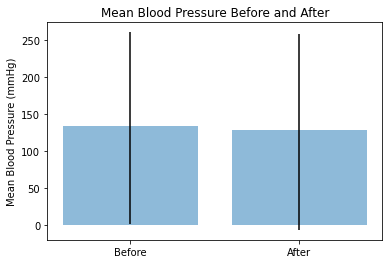

In [11]:
#ploting pon a bar plot
import matplotlib.pyplot as plt

labels = ['Before', 'After']
means = [mean_before, mean_after]
confidence_intervals = [cv_before, cv_after]

x_pos = np.arange(len(labels))
plt.bar(x_pos, means, yerr=confidence_intervals, align='center', alpha=0.5)
plt.xticks(x_pos, labels)
plt.ylabel('Mean Blood Pressure (mmHg)')
plt.title('Mean Blood Pressure Before and After')

plt.show()


c.

In [12]:
#calculating mean absolute deviation
mad_before = data[' Blood Pressure Before (mmHg)'].mad()
mad_after = data[' Blood Pressure After (mmHg)'].mad()

In [13]:
#calculating standard deviation
std_before = data[' Blood Pressure Before (mmHg)'].std()
std_after = data[' Blood Pressure After (mmHg)'].std()

In [14]:
print(f"Blod Pressure Before : Mean Ansolute Deviation is {mad_before} and Stanbdard Deviation is {std_before}")
print(f"Blood Pressure Before : Mean Absolute Deviation is {mad_after} and Standard Deviation is {std_after}")

Blod Pressure Before : Mean Ansolute Deviation is 5.7118 and Stanbdard Deviation is 6.598278012275075
Blood Pressure Before : Mean Absolute Deviation is 5.9 and Standard Deviation is 6.8880221025232276


1.The mean absolute deviation indicates the variability of the data. Higher MAD means higher variability.


d.

In [15]:
#calculating correlation coefficient and p value
correlation_coefficient , p_value = stats.pearsonr(data[' Blood Pressure Before (mmHg)'], data[' Blood Pressure After (mmHg)'])

In [16]:
if p_value < 0.01:
    significance = "Significant correlation"
else:
    significance = "Not significant correlatio"
    
print(f"Correlation coefficient : {correlation_coefficient}")
print(f"P value : {p_value}")
print(f"Significance : {significance}")

Correlation coefficient : 0.9779485966556019
P value : 1.8097381433068541e-68
Significance : Significant correlation


Answer 6

In [17]:
data

,Patient ID,Blood Pressure Before (mmHg),Blood Pressure After (mmHg)
0,1,130,120
1,2,142,135
2,3,120,118
3,4,135,127
4,5,148,140
...,...,...,...
95,96,136,129
96,97,143,137
97,98,127,123
98,99,139,135


In [18]:
Blood_pressure_change = data[' Blood Pressure Before (mmHg)']-data[' Blood Pressure After (mmHg)']

In [19]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk test
statistic, p_value = shapiro(Blood_pressure_change)

# Print the test results
print("Shapiro-Wilk test statistic:", statistic)
print("p-value:", p_value)


Shapiro-Wilk test statistic: 0.9538202285766602
p-value: 0.0014939394313842058


Conclusion : data is normally distributed.

Answer 8

In [20]:

data_therapy = pd.DataFrame({
    'Participant': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Before therapy': [10, 8, 12, 15, 6, 9, 11, 7, 14, 10],
    'After therapy': [7, 6, 10, 12, 5, 8, 9, 6, 12, 8],
    'Difference': [-3, -2, -2, -3, -1, -1, -2, -1, -2, -2]
})


In [21]:
from scipy.stats import wilcoxon

# Perform Wilcoxon signed-rank test
statistic, p_value = wilcoxon(data_therapy['Difference'])

# Print the test results
print("Wilcoxon signed-rank test statistic:", statistic)
print("p-value:", p_value)


Wilcoxon signed-rank test statistic: 0.0
p-value: 0.001953125


We can conclude that the thera[py had significant effect on therapy levels